<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme de Newton </h1>
</center>

## Implémentation 
 
1. Coder l’algorithme de Newton dans le fichier `src/newton.jl` en respectant la spécification donnée dans ce même fichier ;
2. Exécuter les tests ci-dessous et vérifier qu'ils passent.

Pour les tests, nous avons défini les fonctions suivantes $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$
et $f_2 \colon \mathbb{R}^2 \to \mathbb{R}$.

$$
    f_{1}(x_1, x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$
et
$$
    f_{2}(x_1,x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2.
$$

**Remarque.** On peut retrouver ces fonctions dans le fichier `test/fonctions_de_tests.jl`.

In [1]:
include("../src/newton.jl")         # votre algorithme de Newton
include("../test/tester_newton.jl") # la fonction pour tester votre algorithme de Newton

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_newton(newton, afficher); # tester l'algorithme de Newton

Affichage des résultats des algorithmes : false



Test Summary:        | Pass  Total  Time
algorithme de Newton |   19     19  2.5s


In [2]:
include("../src/newton.jl") # votre algorithme de Newton
include("../test/fonctions_de_tests.jl") # pour avoir la fonction d'affichage des résultats

# Fonction f0
# -----------
f0(x)      =  sin(x)
grad_f0(x) =  cos(x) # la gradient de la fonction f0
hess_f0(x) = -sin(x) # la hessienne de la fonction f0
solution   = -pi/2

x0 = solution
x_sol, f_sol, flag, nb_iters = newton(f0, grad_f0, hess_f0, x0)
afficher_resultats("Newton", "f0", x0, x_sol, f_sol, flag, nb_iters, solution)

x0 = -pi/2+0.5
x_sol, f_sol, flag, nb_iters = newton(f0, grad_f0, hess_f0, x0)
afficher_resultats("Newton", "f0", x0, x_sol, f_sol, flag, nb_iters, solution)

x0 = pi/2
x_sol, f_sol, flag, nb_iters = newton(f0, grad_f0, hess_f0, x0)
afficher_resultats("Newton", "f0", x0, x_sol, f_sol, flag, nb_iters, solution)


-------------------------------------------------------------------------
Résultats de : Newton appliqué à f0:
  * x0       = 

-1.5707963267948966
  * x_sol    = -1.5707963267948966
  * f(x_sol) = -1.0
  * nb_iters = 0
  * flag     = 0
  * solution = -1.5707963267948966
-------------------------------------------------------------------------
Résultats de : Newton appliqué à f0:
  * x0       = -1.0707963267948966
  * x_sol    = -1.5707963267949088
  * f(x_sol) = -1.0
  * nb_iters = 3
  * flag     = 0
  * solution = -1.5707963267948966
-------------------------------------------------------------------------
Résultats de : Newton appliqué à f0:
  * x0       = 1.5707963267948966
  * x_sol    = 1.5707963267948966
  * f(x_sol) = 1.0
  * nb_iters = 0
  * flag     = 0
  * solution = -1.5707963267948966


## Interprétation 

1. Justifier les résultats obtenus pour l'exemple $f_0$ ci-dessus;
2. Justifier que l’algorithme implémenté converge en une itération pour $f_{1}$;
3. Justifier que l’algorithme puisse ne pas converger pour $f_{2}$ avec certains points initiaux.

**Remarque.** Vous pouvez mettre `affiche=true` dans les tests de l'algorithme de Newton pour
vous aider.


### Q1

Suivant le point de départ $x_0$ on peut trouver un 0 du gradient qui correspond a un max ou un min de la fonction f0. En effet l'algorithme de Newton trouve des zéros du gradient sans distinction de max ou min.

Pour le premier et le troisième test, la CN1 est vérifiée dès la première itération car le gradient est nul en ce point. Pour le deuxième test, la CN1 n'est pas tout de suite vérifiée mais converge en 3 itérations. 

Cependant pour le troisème test, avec ce point de départ, l'algorithme converge vers un maximum. 

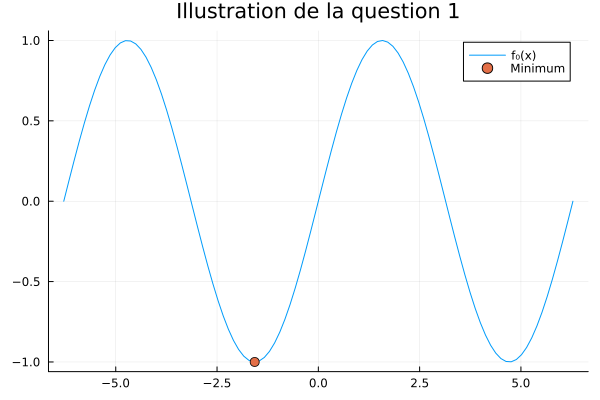

In [ ]:
using Plots

f0(x) = sin(x)
gf0(x) = cos(x)
hf0(x) = -sin(x)

x0 = -pi/2
x_sol, f_sol, flag, nb_iters = newton(f0, gf0, hf0, x0)

x_range = range(-2π, stop=2π, length=100)
y = f0.(x_range)
plot(x_range, y, label="f₀(x)")
scatter!([x_sol], [f_sol], label="Minimum", markersize=5)
title!("Illustration de la question 1")

### Q2

La fonction $f_1$ est une fonction quadratique. Ainsi le gradient est linéaire et la hessienne est constante. On trouve donc la direction de descente en une itération en résolvant le système linéaire $H(x_k) d_k = -\nabla f(x_k)$.


In [ ]:
# Question 2 : Exemple de recherche de minimum pour f1

f1(x) = 2*(x[1] + x[2] + x[3] -3)^2 + (x[1]-x[2])^2 + (x[2] - x[3])^2
gf1(x) = [ 4*(x[1]+x[2]+x[3]-3) + 2 *(x[1]-x[2]) ; 
           4*(x[1]+x[2]+x[3]-3) - 2 *(x[1]-x[2]) + 2 *(x[2]-x[3]) ;
           4*(x[1]+x[2]+x[3]-3) - 2 *(x[2]-x[3])]
hf1(x) = [ 6 2 4 ; 2 8 2 ; 4 2 6 ]
x1 = [200 ; -200 ; 48000]
x_sol, f_sol, flag, nb_iters = newton(f1, gf1, hf1, x1)

afficher_resultats("Newton", "f1", x1, x_sol, f_sol, flag, nb_iters, [1; 1; 1])

-------------------------------------------------------------------------
Résultats de : Newton appliqué à f1:
  * x0       = [200, -200, 48000]
  * x_sol    = [1.0, 1.0, 1.0]
  * f(x_sol) = 0.0
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]


### Q3

La fonction $f_2$ est une fonction non convexe. On a $H(x) = \begin{pmatrix} -400*(x_2-3*x_1^2)+2 & -400*x_1 \\-400*x_1 & 200 \end{pmatrix}$ qui n'est pas inversible pour certains x.

Par exemple pour $x_0 = \begin{pmatrix} 0 \\ 1/200 \end{pmatrix}$, on a $H(x_0) = \begin{pmatrix} 0 & 0 \\ 0 & 200 \end{pmatrix}$. Donc lorsque l'on calcule $d_1 = -H(x_0)^{-1} \nabla f(x_0)$ on ne peut pas inverser la hessienne.

In [15]:
# On s'attend a avoir une erreur

f2(x) = 100(x[2]-x[1]^2)^2 + (1-x[1])^2
gf2(x) = [ -400*x[1]*(x[2]-x[1]^2) - 2*(1-x[1]) ; 200*(x[2]-x[1]^2) ]
hf2(x) = [ -400*(x[2]-3*x[1]^2)+2  -400*x[1] ; 
           -400*x[1]  200 ]

x2 = [0; 1/200]
x_sol, f_sol, flag, nb_iters = newton(f2, gf2, hf2, x2)

afficher_resultats("Newton", "f2", x2, x_sol, f_sol, flag, nb_iters, [1; 1])

SingularException: SingularException(1)